# Manifold Learning - Handwritten Digits

## Example code is using the following template
http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

## Authors:
Fabian Pedregosa <fabian.pedregosa@inria.fr>

Olivier Grisel <olivier.grisel@ensta.org>

Mathieu Blondel <mathieu@mblondel.org>

Gael Varoquaux
## License: BSD 3 clause (C) INRIA 2011

Automatically created module for IPython interactive environment


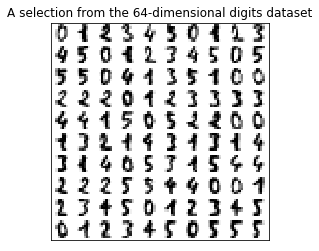

In [35]:
# Adjustments by S.Kuehn, stefan.kuehn@posteo.de

print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
%matplotlib inline
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None,subplot=111):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(subplot)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 10
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
plt.show()

Computing sparse random projection
Computing Gaussian random projection
Computing PCA projection
Computing Isomap embedding
Done.
Computing LLE embedding
Done. Reconstruction error: 1.63544e-06
Computing modified LLE embedding
Done. Reconstruction error: 0.360652
Computing Hessian LLE embedding
Done. Reconstruction error: 0.212804
Computing LTSA embedding
Done. Reconstruction error: 0.212804
Computing MDS embedding
Done. Stress: 139568117.567178
Computing Spectral embedding
Computing t-SNE embedding
Computing UMAP embedding


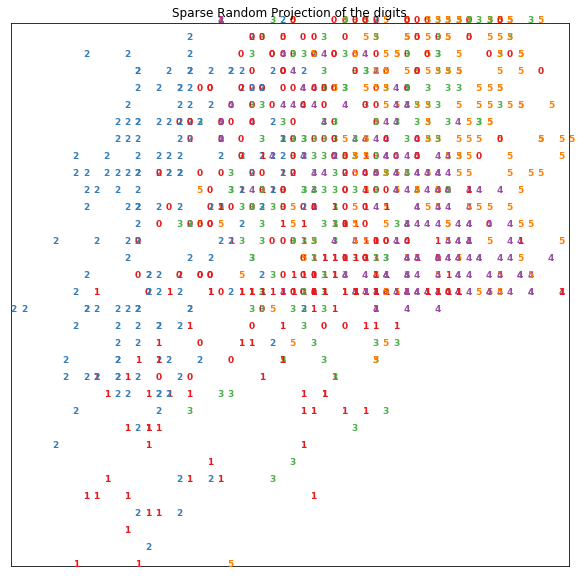

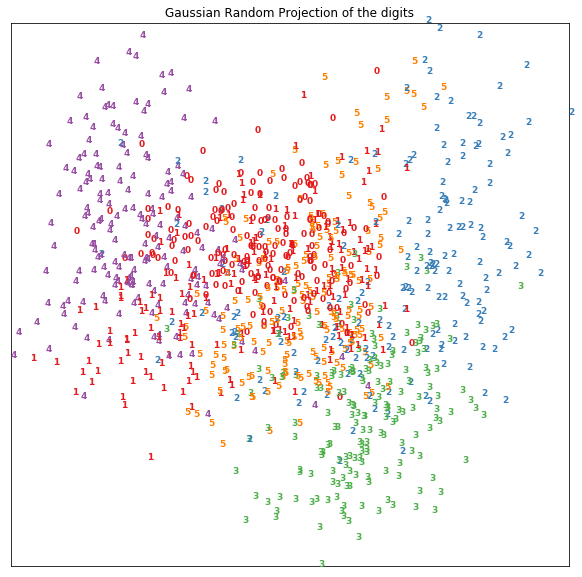

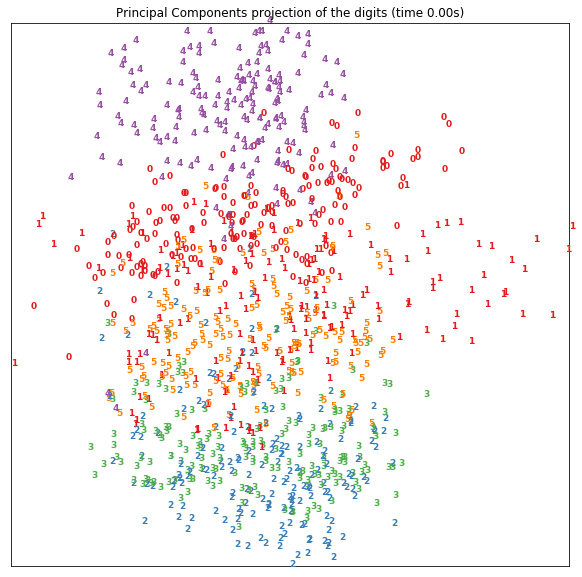

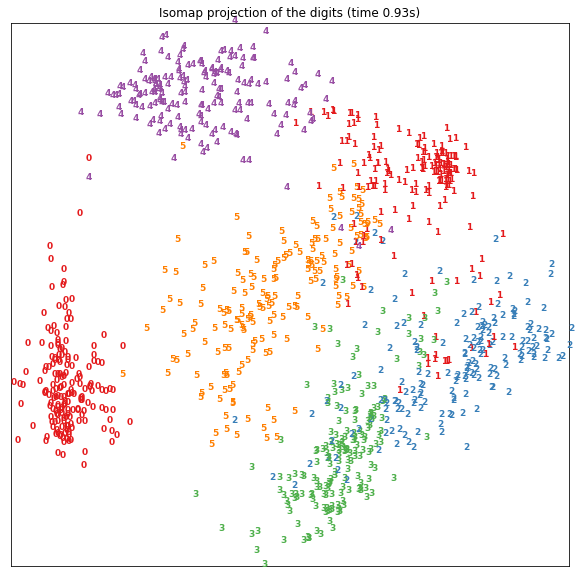

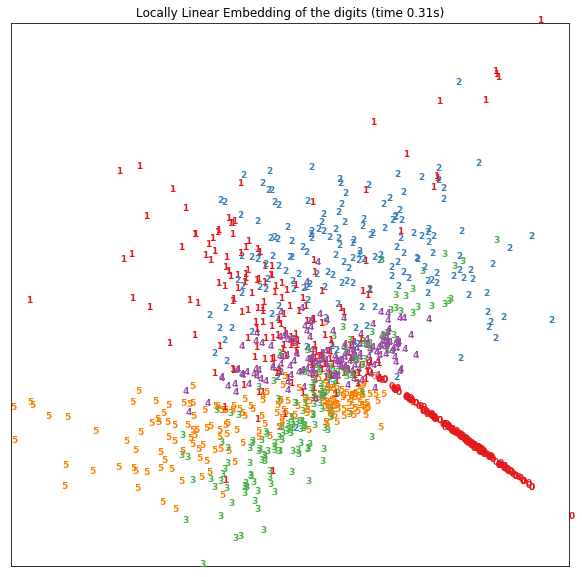

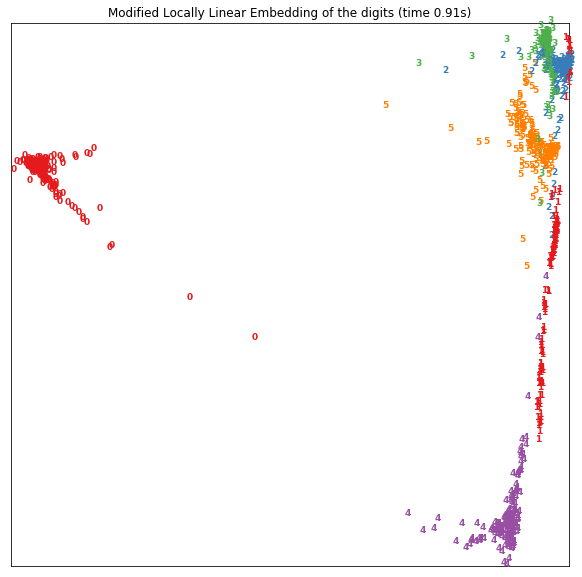

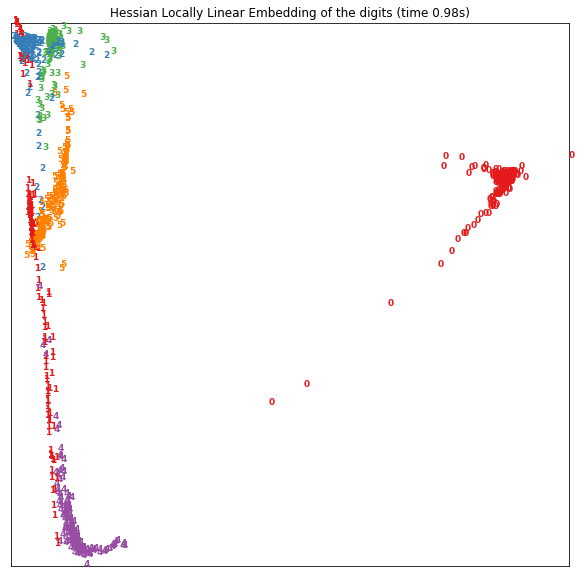

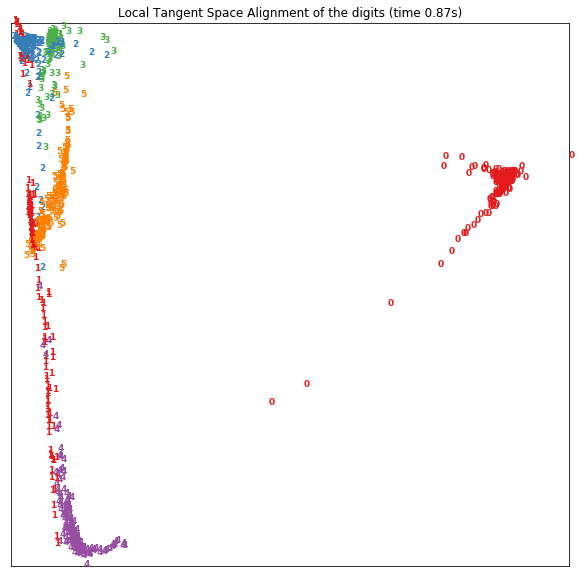

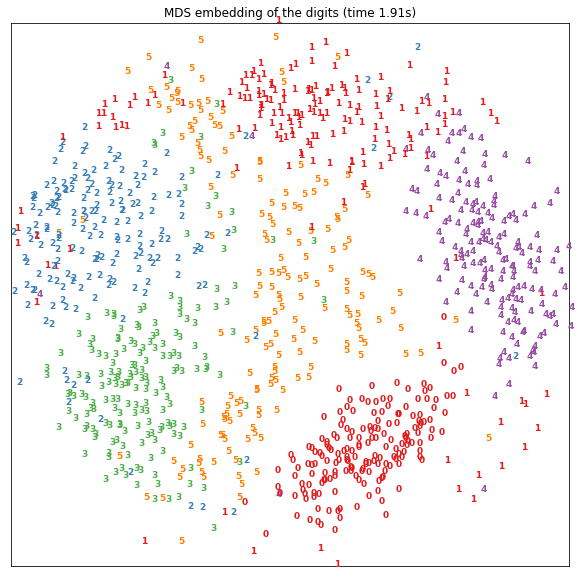

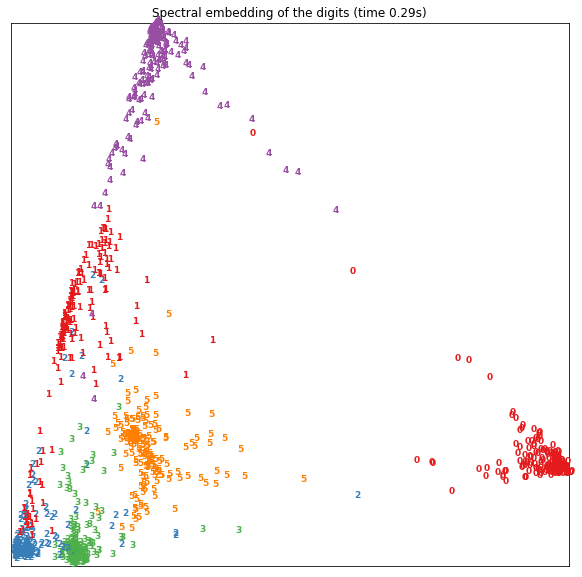

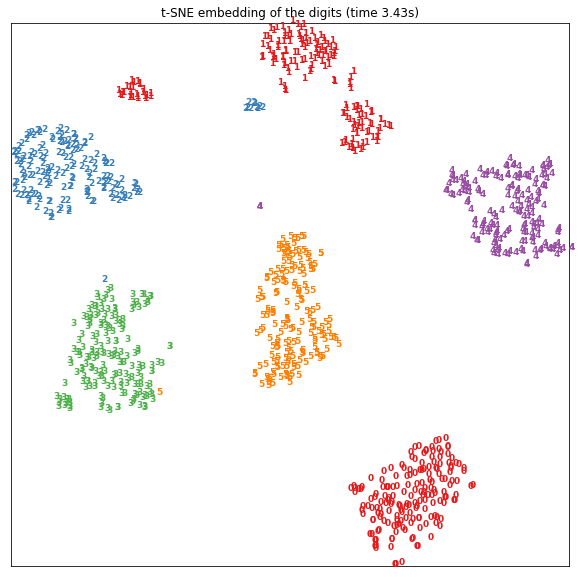

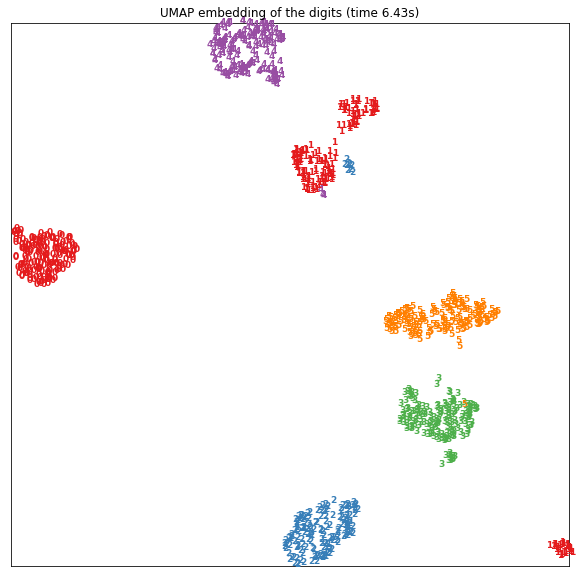

In [36]:
#----------------------------------------------------------------------
# Sparse Random 2D projection using a random unitary matrix
print("Computing sparse random projection")
srp = random_projection.SparseRandomProjection(n_components=3, random_state=42)
X_projected = srp.fit_transform(X)
plot_embedding(X_projected, "Sparse Random Projection of the digits")


#----------------------------------------------------------------------
# Gaussian Random 2D projection using a random unitary matrix
print("Computing Gaussian random projection")
grp = random_projection.GaussianRandomProjection(n_components=3, random_state=42)
X_projected = grp.fit_transform(X)
plot_embedding(X_projected, "Gaussian Random Projection of the digits")


#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2, eigen_solver='dense',
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle,
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2, eigen_solver='dense',
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle,
               "Modified Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# HLLE embedding of the digits dataset
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2, eigen_solver='dense',
                                      method='hessian')
t0 = time()
X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_hlle,
               "Hessian Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2, eigen_solver='dense',
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa,
               "Local Tangent Space Alignment of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
mds = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = mds.fit_transform(X)
print("Done. Stress: %f" % mds.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0, eigen_solver="arpack")

t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# UMAP embedding of the digits dataset
print("Computing UMAP embedding")
import umap
X_umap = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist=0.3,
                      metric='correlation').fit_transform(digits.data)

plot_embedding(X_umap,
               "UMAP embedding of the digits (time %.2fs)" %
               (time() - t0))

# Show plots
plt.show()

## Check singular values as criterion for dimensionality of the data

In [3]:
from sklearn.decomposition import TruncatedSVD
t0 = time()
svd = TruncatedSVD(n_components=63, n_iter=7, random_state=42)
svd.fit(X)  
print(np.cumsum(svd.explained_variance_ratio_))  
#print(svd.explained_variance_ratio_.sum())  
print(svd.singular_values_)
t1 = time()

[0.02632557 0.2189581  0.38324694 0.49820778 0.58337399 0.63585882
 0.68199925 0.71783462 0.74652876 0.77244987 0.79468799 0.81494471
 0.83284631 0.84780871 0.86085431 0.87227158 0.88293103 0.89258262
 0.90187187 0.90991751 0.91776493 0.92465064 0.93087341 0.93644121
 0.94171388 0.94670299 0.95136407 0.95581217 0.9597636  0.96345522
 0.96685965 0.970003   0.97304134 0.97594633 0.97860184 0.98115858
 0.98342094 0.98547931 0.98744857 0.98923389 0.99083174 0.99242335
 0.99381542 0.99507085 0.99620499 0.99724207 0.99823192 0.99890483
 0.99928779 0.99958896 0.99975484 0.999863   0.99991709 0.99996613
 0.99998571 0.99999117 0.99999539 0.99999738 0.99999865 0.99999948
 1.         1.         1.        ]
[1.69812088e+03 5.03692773e+02 4.65214368e+02 3.89108978e+02
 3.34915209e+02 2.62916901e+02 2.46533588e+02 2.17247746e+02
 1.94401238e+02 1.84809192e+02 1.71138081e+02 1.63336329e+02
 1.53561296e+02 1.40381666e+02 1.31090170e+02 1.22624651e+02
 1.18489531e+02 1.12744592e+02 1.10611960e+02 1.029

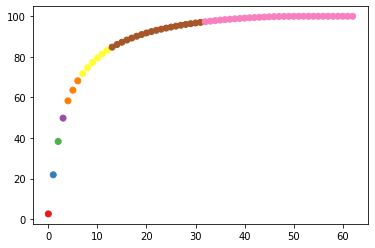

In [6]:
#plt.scatter(range(0,63),svd.singular_values_[0:63])
plt.scatter(range(0,63),100*np.cumsum(svd.explained_variance_ratio_),color=plt.cm.Set1(0.8*np.cumsum(svd.explained_variance_ratio_)))
plt.show()

### The first 40 singular values cover 99% of the variance

# Practical Task Dimensionality Reduction

* Use one of the fast manifold learning methods as preprocessor for dimensionality reduction

* Then apply some other methods and compare the results and runtimes

Computing random projection as preprocessing + other methods
(1083, 40)
Preprocessing time: 0.002276182174682617
t-SNE reduced: 3.0097830295562744


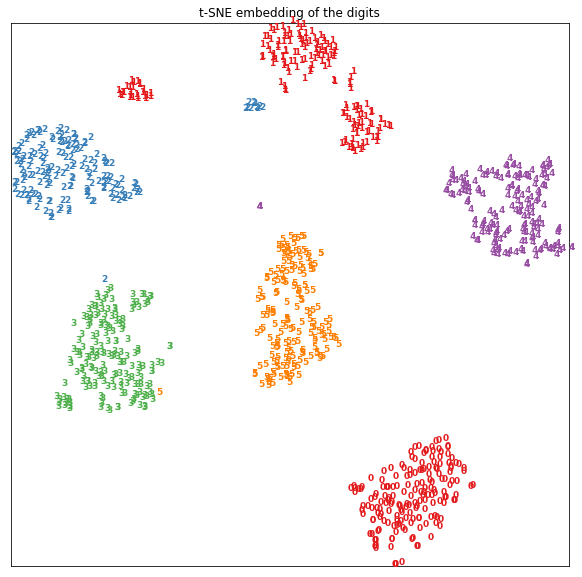

In [56]:
#----------------------------------------------------------------------
# First: Use Random 2D projection using a random unitary matrix to project to lower dimension (check decay of singular values)
# Second: Apply whatever you want
print("Computing random projection as preprocessing + other methods")
#rp_pre = random_projection.SparseRandomProjection(n_components=16, random_state=0)
rp_pre = random_projection.GaussianRandomProjection(n_components=40, random_state=0)
t0 = time()
X_projected_pre = rp_pre.fit_transform(X)
print(X_projected_pre.shape)
print("Preprocessing time:", time()-t0) # O
#t0 = time()
#X_projected_mds = mds.fit_transform(X_projected_pre)
#print("MDS reduced:", time()-t0)

tsne2 = manifold.TSNE(n_components=2, init='random', random_state=0)
#tsne2 = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_projected_tsne = tsne2.fit_transform(X_projected_pre)
print("t-SNE reduced:",time()-t0)

#----------------------------------------------------------------------
# Plot examples
#plot_embedding(X_mds, "MDS of the digits")
#plot_embedding(X_projected_mds, "Random Projecton + MDS of the digits")
plot_embedding(X_tsne,"t-SNE embedding of the digits")
#plot_embedding(X_projected_tsne,"Random Projection + t-SNE embedding of the digits")


In [8]:
# Generate subplots in given plot
# Scale and visualize the embedding vectors
def plot_embedding_variant(X, title=None,subplot=111):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    ax = plt.subplot(subplot)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


Computing PCA projection as preprocessing + other methods
Preprocessing Time: 0.021548986434936523
Reduced Dimension: (1083, 40)


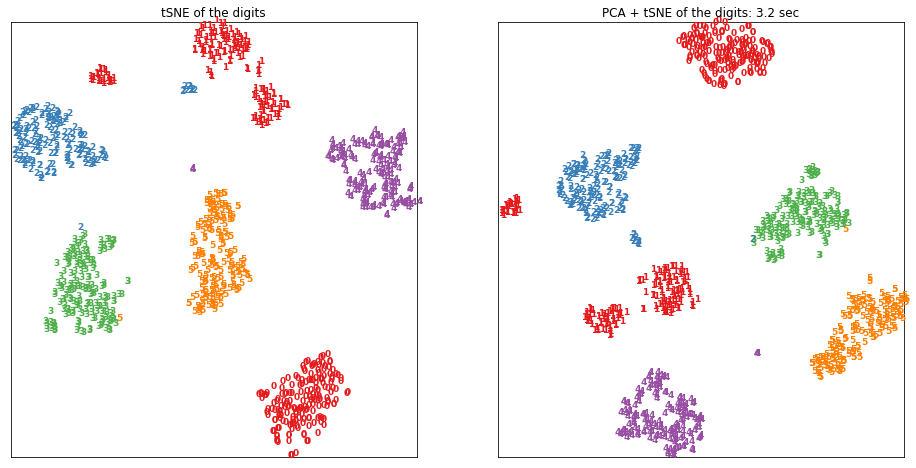

In [51]:
# First: Use PCA to project to low-dim space (according to decay of singular values)
# Second: Apply whatever you want
print("Computing PCA projection as preprocessing + other methods")
pca_pre = decomposition.TruncatedSVD(n_components=40)
t0 = time()
X_projected_pre = pca_pre.fit_transform(X)
t1 = time()
print("Preprocessing Time:", t1-t0)
print("Reduced Dimension:", X_projected_pre.shape)

#t0 = time()
#X_projected_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X_projected_pre, y)
#t1 = time()

#mds = manifold.MDS(n_components=2, n_init=1, max_iter=1000) # change max_iter if you like
#t0 = time()
#X_mds = mds.fit_transform(X)
#t1 = time()

#t0 = time()
#X_projected_mds = mds.fit_transform(X_projected_pre)
#t1 = time()

#t0 = time()
#X_projected_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X_projected_pre)
#t1 = time()

tsne2 = manifold.TSNE(n_components=2, init='random', random_state=0)
t0 = time()
X_projected_tsne = tsne2.fit_transform(X_projected_pre)
t1 = time()

#----------------------------------------------------------------------
# Plot everything

fig = plt.figure(figsize=(16, 8))
#plot_embedding_variant(X_mds, "MDS of the digits",subplot=121)
#plot_embedding_variant(X_projected_mds, "PCA + MDS of the digits",subplot=122)
plot_embedding_variant(X_tsne, "tSNE of the digits",subplot=121)
plot_embedding_variant(X_projected_tsne, "PCA + tSNE of the digits: %.2g sec" % (t1 - t0),subplot=122)


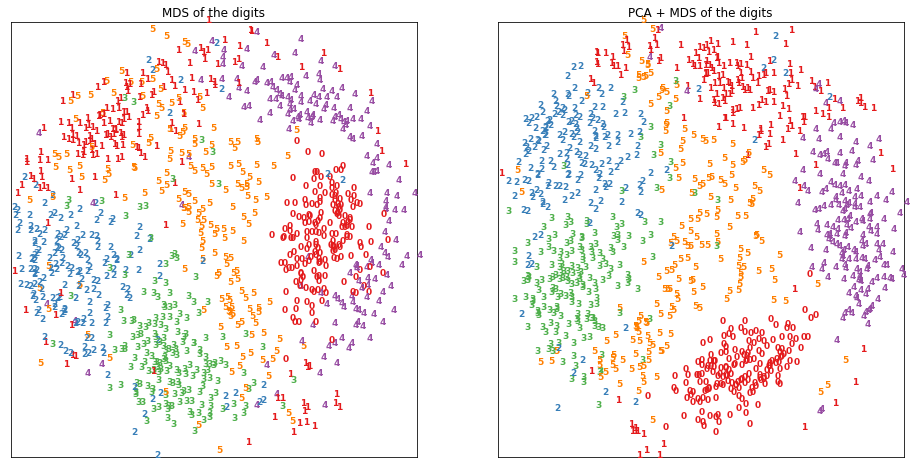

In [49]:
fig = plt.figure(figsize=(16, 8))
plot_embedding_variant(X_mds, "MDS of the digits",subplot=121)
plot_embedding_variant(X_projected_mds, "PCA + MDS of the digits",subplot=122)